In [3]:
import numpy as np

# Ground truth and predictions from the table
ground_truth = np.array([
    [0, 0, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 0]
])

predictions = np.array([
    [0, 0.2, 0.8],
    [0.1, 0.1, 0.8],
    [0.2, 0.7, 0.1],
    [0.7, 0.1, 0.2],
    [0.8, 0.2, 0],
    [0, 0.2, 0.8],
    [0.1, 0.7, 0.2],
    [0.1, 0.8, 0.1]
])

epsilon = 1e-15
adjusted_predictions = np.clip(predictions, epsilon, 1 - epsilon)

# Categorical Cross Entropy loss calculation
cce_loss_adjusted = - \
    np.sum(ground_truth * np.log(adjusted_predictions)) / len(ground_truth)
cce_loss_adjusted

0.27321782354840574

In [19]:
import numpy as np

y_true = np.array([0.2, 0.3, 0.2, 0.3])

y_pred_1 = np.array([0.1, 0.6, 0.1, 0.2])
y_pred_2 = np.array([0.1, 0.1, 0.2, 0.6])


# # Normalize predictions
# y_pred_1 = y_pred_1 / np.sum(y_pred_1)
# y_pred_2 = y_pred_2 / np.sum(y_pred_2)

# Calculate ABS LOSS directly
abs_loss_1 = np.sum(np.abs(y_true - y_pred_1))
abs_loss_2 = np.sum(np.abs(y_true - y_pred_2))

# Calculate KL LOSS
kl_loss_1 = np.sum(y_true * np.log(y_true / y_pred_1))
kl_loss_2 = np.sum(y_true * np.log(y_true / y_pred_2))

abs_loss_1, kl_loss_1, abs_loss_2, kl_loss_2

(0.6, 0.19095425048844378, 0.6, 0.26026896854443826)

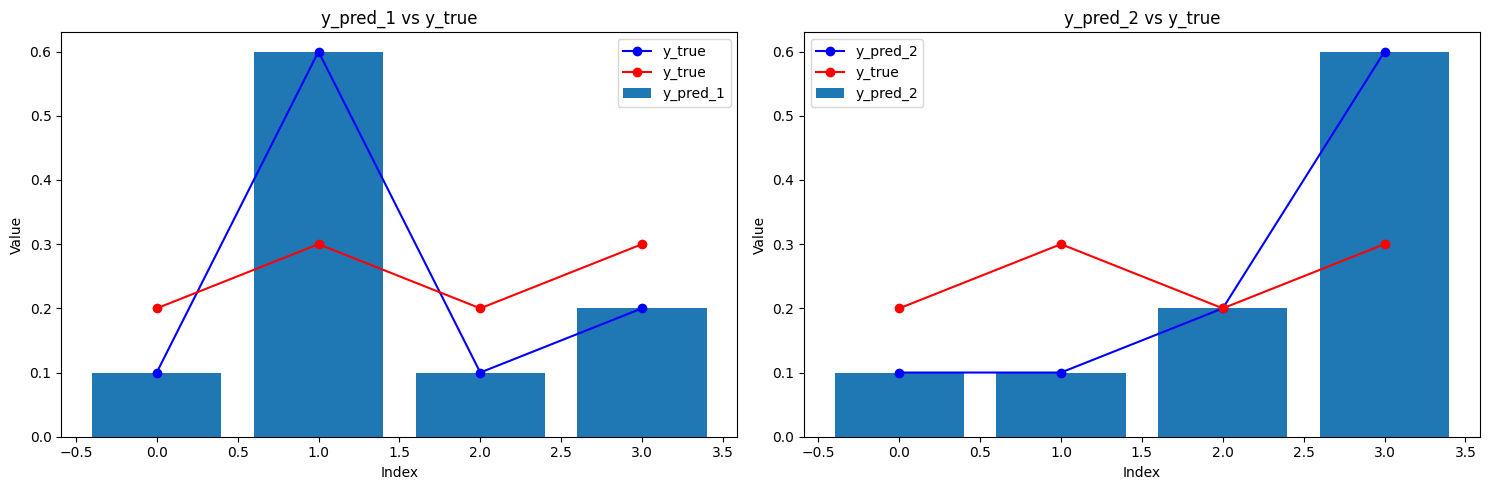

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data
y_true = np.array([0.2, 0.3, 0.2, 0.3])
y_pred_1 = np.array([0.1, 0.6, 0.1, 0.2])
y_pred_2 = np.array([0.1, 0.1, 0.2, 0.6])

# Create figure and subplots
fig,  (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 5))


# Subplot 2: Bar plot of y_pred_1 with y_true as line
ax2.bar(range(len(y_pred_1)), y_pred_1, label='y_pred_1')
ax2.plot(range(len(y_pred_1)), y_pred_1,
         color='blue', marker='o', label='y_true')
ax2.plot(range(len(y_true)), y_true, color='red', marker='o', label='y_true')
ax2.set_title('y_pred_1 vs y_true')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()

# Subplot 3: Bar plot of y_pred_2 with y_true as line
ax3.bar(range(len(y_pred_2)), y_pred_2, label='y_pred_2')
ax3.plot(range(len(y_pred_2)), y_pred_2,
         color='blue', marker='o', label='y_pred_2')
ax3.plot(range(len(y_true)), y_true, color='red', marker='o', label='y_true')
ax3.set_title('y_pred_2 vs y_true')
ax3.set_xlabel('Index')
ax3.set_ylabel('Value')
ax3.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import log_loss

# Calculate log loss using scikit-learn
log_loss_value = log_loss(ground_truth, predictions)
log_loss_value

0.2732178235484058

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

In [4]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

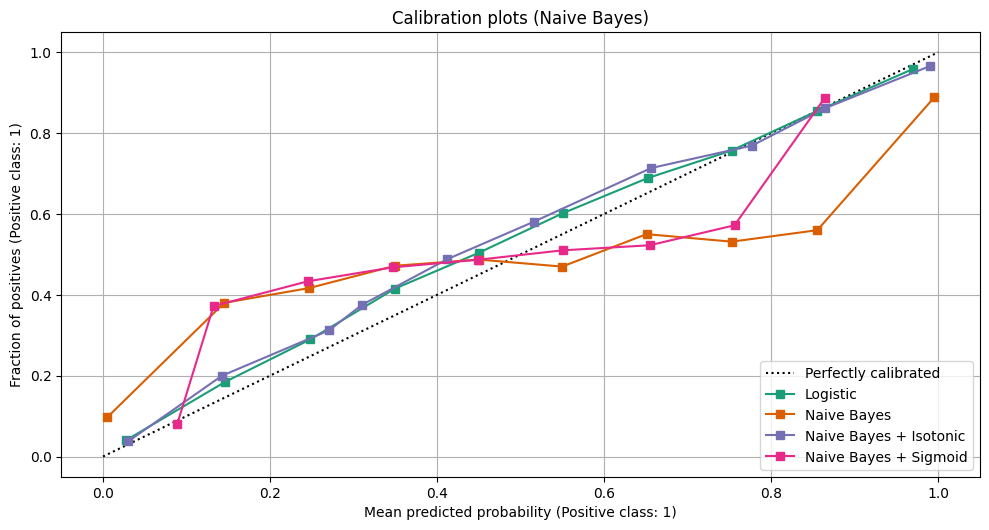

In [5]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# # Add histogram
# grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(clf_list):
#     row, col = grid_positions[i]
#     ax = fig.add_subplot(gs[row, col])

#     ax.hist(
#         calibration_displays[name].y_prob,
#         range=(0, 1),
#         bins=10,
#         label=name,
#         color=colors(i),
#     )
#     ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()